In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
class Logistic_Regression():
    
    # Initialize the learning rate and number of iterations
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        
    # Fit the model to training dataset
    def fit(self, X, y):
        
        # p --> represent the number of data points in the dataset
        # n --> represent the number of features in the dataset
        self.p, self.n = X.shape
        
        # Initialize the starting values for m and b 
        self.m = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y
        
        # The gradient descent learning
        for i in range(self.iterations):
            self.gradient_descent()
        
    def gradient_descent(self):
        # y_prediction formula --> sigmoid function
        y_hat = 1 / (1 + np.exp( - (self.X.dot(self.m) + self.b) ))
            
        # Calculate the derivatives
        derivative_m = (1 / self.p) * np.dot(self.X.T, (y_hat - self.y))
        derivative_b = (1 / self.p) * np.sum(y_hat - self.y)
            
        # Updating the gradient
        self.m = self.m - self.learning_rate * derivative_m
        self.b = self.b - self.learning_rate * derivative_b
            
        # The sigmoid formula for predicting and decision boundary
    def predict(self, X):
        y_pred = 1 / (1 + np.exp( - (X.dot(self.m) + self.b) ))
        y_pred = np.where(y_pred > 0.5, 1, 0) # if the probability values higher than 0.5 return 1 else 0
        return y_pred 
        

In [3]:
# Loading the dataset
df = pd.read_csv('diabetes.csv')

In [4]:
# The first 5 rows of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Number of rows and columns
df.shape

(768, 9)

In [6]:
# Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Statistical summary of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

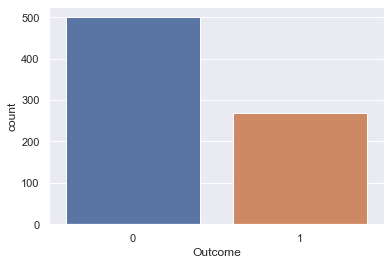

In [8]:
# The number of diabetic and not diabetic, 0 -> not diabetic and 1 -> diabetic
sns.countplot(x=df['Outcome'])

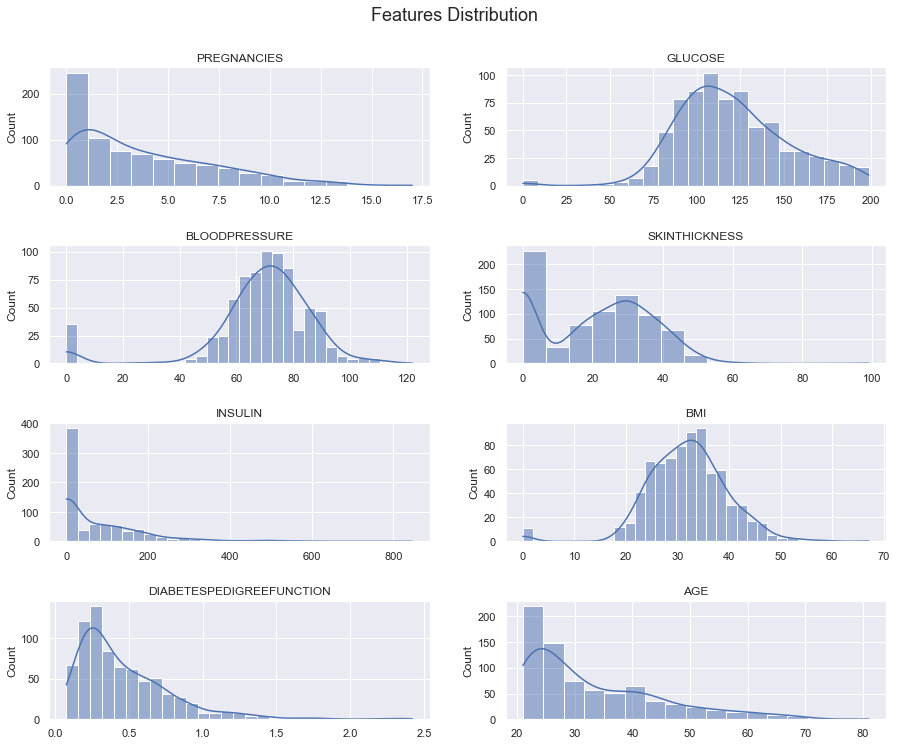

In [9]:
# Visualize the distribution of each feature

features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Features Distribution", fontsize=18, y=0.95)

for n, feature in enumerate(features):
    # add a new subplot iteratively
    ax = plt.subplot(4, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    sns.histplot(df[feature], kde=True)

    # chart formatting
    ax.set_title(feature.upper())
    ax.set_xlabel("")

In [10]:
# Show the mean of each feature by the diabetic and not diabetic
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
# Separating the labels
X = df.drop('Outcome', axis=1)
y= df['Outcome']

In [12]:
# The features for predict
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
# The output
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [14]:
# Standarized the data to make easier for the model 
scaler = StandardScaler()

In [15]:
scaler.fit(X)
standarized_data = scaler.transform(X)

In [16]:
standarized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [17]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(standarized_data, y, test_size=0.2)

In [18]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(614, 8) (154, 8)
(614,) (154,)


#### Training the model

In [19]:
# Training the model
model = Logistic_Regression(learning_rate = 0.01, iterations=1000)
model.fit(X_train, y_train)

#### Model Evaluation

In [20]:
# Accuracy score on the training data
training_prediction = model.predict(X_train)
training_accuracy_score = accuracy_score(y_train, training_prediction)
print('Accuracy score for the training data:', training_accuracy_score)

Accuracy score for the training data: 0.7833876221498371


In [21]:
# Accuracy score on the training data
testing_prediction = model.predict(X_test)
testing_accuracy_score = accuracy_score(y_test, testing_prediction)
print('Accuracy score for the training data:', testing_accuracy_score)

Accuracy score for the training data: 0.7012987012987013


#### Training the logistic regression from sklearn

In [22]:
logreg = LogisticRegression(random_state=42)

In [23]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

#### Sklearn logistic regression model evaluation

In [24]:
# Accuracy score on the training data
training_prediction = logreg.predict(X_train)
training_accuracy_score = accuracy_score(y_train, training_prediction)
print('Accuracy score for the training data:', training_accuracy_score)

Accuracy score for the training data: 0.7817589576547231


With our model we have 0.7703 accuracy score for the training data

With Sklearn we have 0.7768 accuracy score for the training data

#### Making prediction by input

In [25]:
data =(2, 150, 65, 24, 170, 21.5, 0.510, 48)

# Convert data to numpy array
input_feature = np.asarray(data)

# Reshape the array
input_feature = input_feature.reshape(1, -1)

# Standarized the input data
standarized_input_data = scaler.fit_transform(input_feature)

In [26]:
# make prediction
model_prediction = model.predict(standarized_input_data)
print(model_prediction)

if model_prediction ==0 :
    print('The Person is not diabetes')
elif model_prediction ==1 :
    print('The Person is diabetes')

[0]
The Person is not diabetes
